In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")

In [7]:
from project.utils.ds.dataset import BoxedExamplesDataset
from pathlib import Path
from project.utils.ds import transforms as tr
from project.utils.ds.images import is_grayscale

In [8]:
train_path = Path("../data/stage1_train/")
ds = BoxedExamplesDataset.from_path(train_path)

670it [01:15,  8.86it/s]


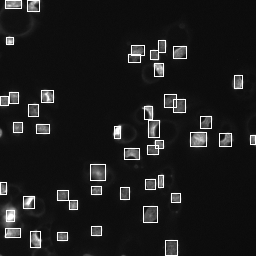

In [9]:
ds[0].vis_boxes(1)

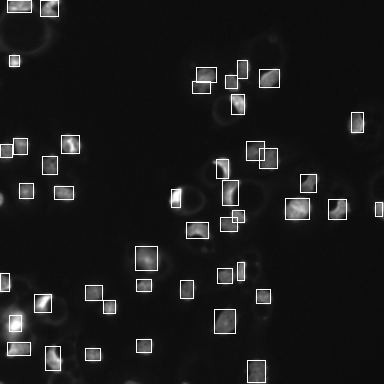

In [10]:
tr.resize(ds[0], 1.5, 1.5).vis_boxes(1)

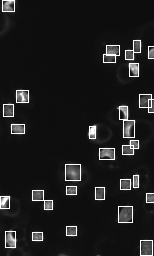

In [11]:
tr.crop(
    ds[0],
    0.1, 0., 0.7, 1
).vis_boxes()

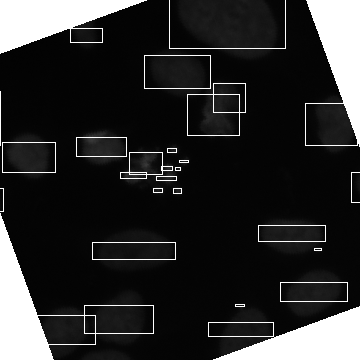

In [12]:
tr.rotate(
    ds[1],
    20
).vis_boxes()

In [13]:
colors = [
    e for e in ds if not is_grayscale(e.image)
]

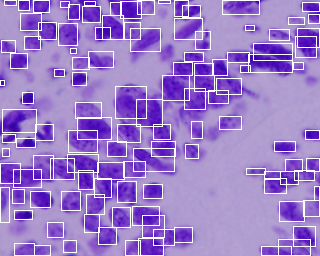

In [14]:
colors[0].vis_boxes()

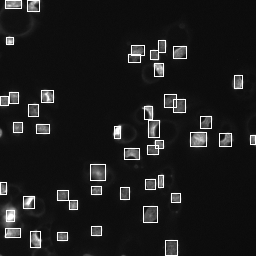

In [15]:
ds[0].vis_boxes()

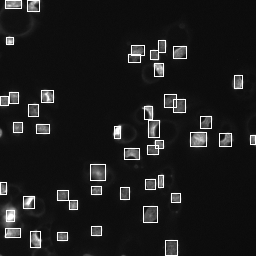

In [16]:
tr.flip_color_on_intensity_heuristic(
    ds[0]
).vis_boxes()

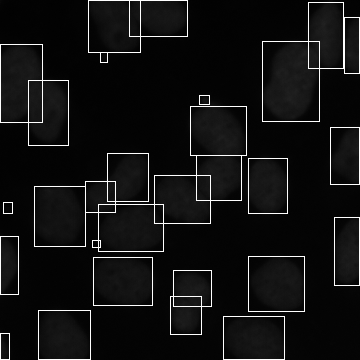

In [17]:
tr.to_grayscale(
tr.flip_color_on_intensity_heuristic(
   ds[500]
)).vis_boxes()
# colors[1].vis_boxes()


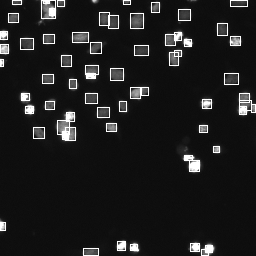

In [30]:
tr.make_max_255(ds[10]).vis_boxes()